# init

In [7]:
import sys, os
import numpy as np
import pandas as pd
from shapely.geometry import Point, LineString, MultiLineString, base as sg
from matplotlib import pyplot as plt, axes
from timeit import default_timer as timer
from datetime import timedelta
from pprint import pprint


from flat_norm_fixture import FlatNormFixture, close_fig



fx = FlatNormFixture('runTest')
fx.fig_dir = "figs/notebooks"
fx.out_dir = "outs/notebooks"

# plot regions

## sample_regions

In [ ]:
area = 'mcbryde'
epsilon = 2e-3
num_regions = 6
region = 2

# read geometries
act_geom, synt_geom, hull = fx.read_networks(area)

# sample regions
point_list, region_list = fx.sample_regions(
    hull, num_regions=num_regions, epsilon=epsilon, seed=54321
)

# plot regions
fig, ax = fx.plot_regions_list(
    act_geom, synt_geom, region_list, area,
    show=True,
    region_highlight=region,
    file_name_sfx=f"sr_region_{region}",
    figsize=(40, 20),
    do_return=True
)

## sample_regions_geom

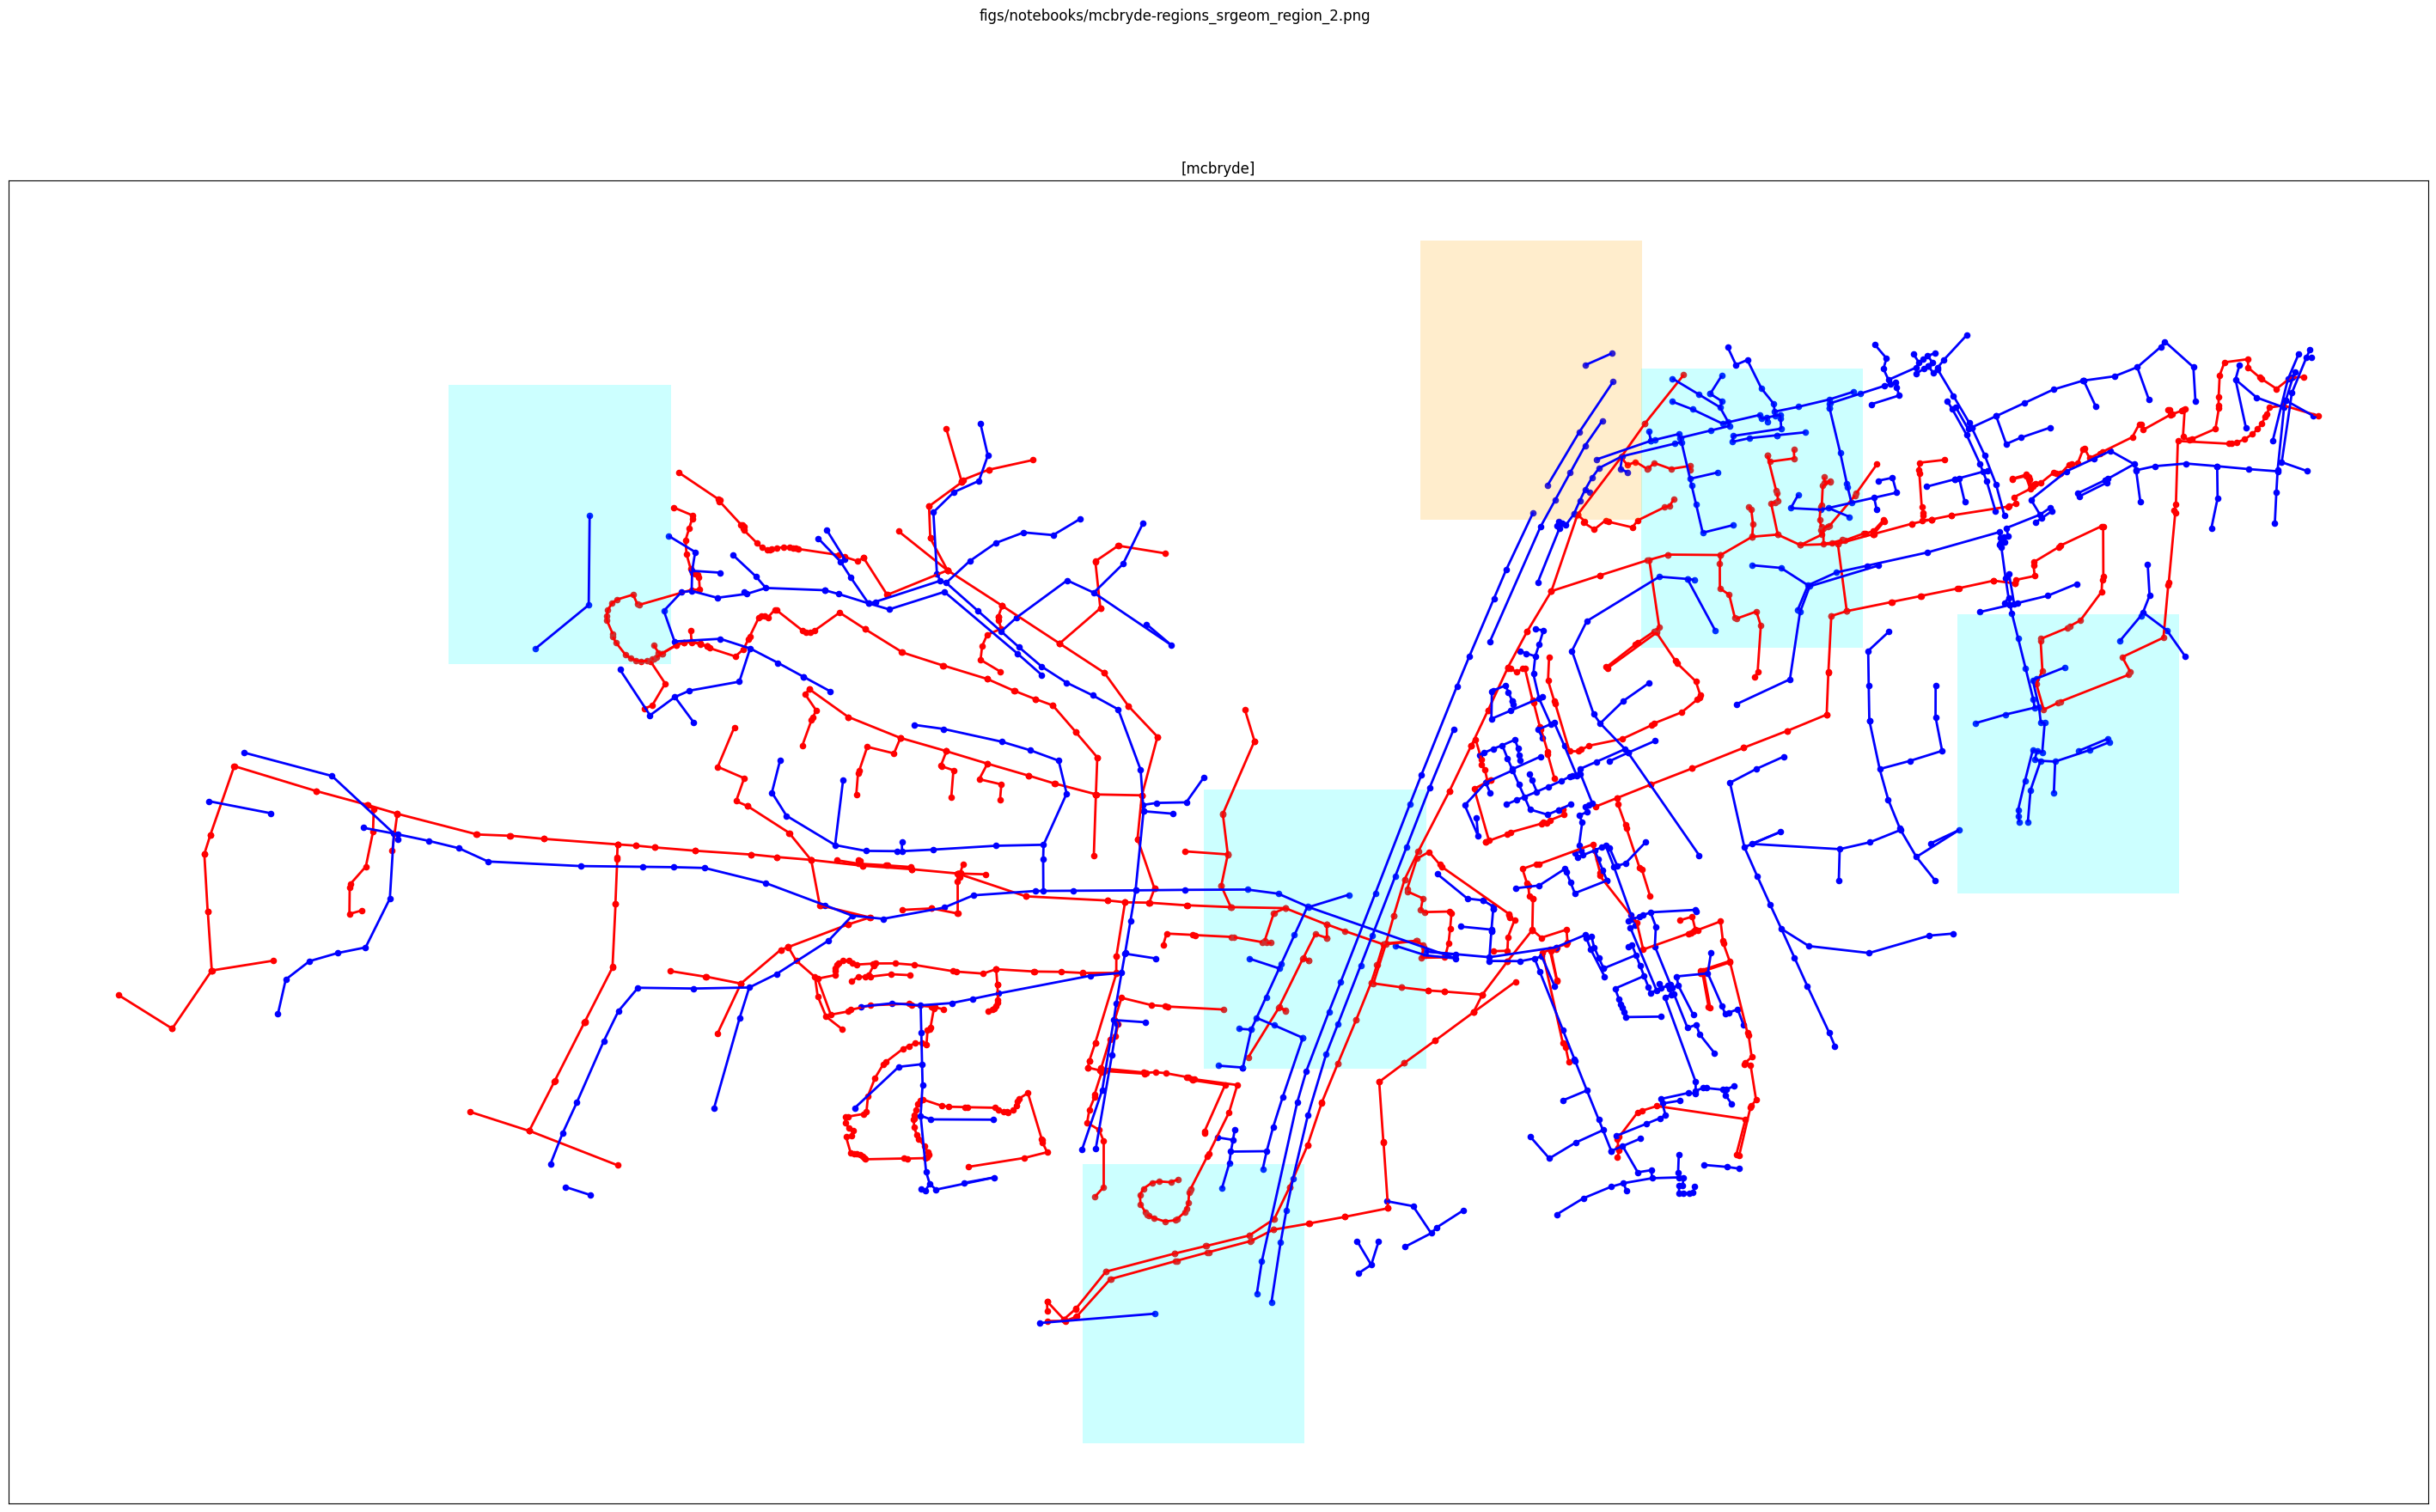

In [2]:
area = 'mcbryde'
epsilon = 2e-3
num_regions = 6
region = 2

# read geometries
act_geom, synt_geom, hull = fx.read_networks(area)

# sample regions
point_list, region_list = fx.sample_regions_geom(
    hull, act_geom, synt_geom,
    num_regions=num_regions, epsilon=epsilon,
    seed=54321
)

# plot regions
fig, ax = fx.plot_regions_list(
    act_geom, synt_geom, region_list, area,
    show=True,
    region_highlight=region,
    file_name_sfx=f"srgeom_region_{region}",
    figsize=(40, 20),
    do_return=True
)

# compute and plot region flatnorm

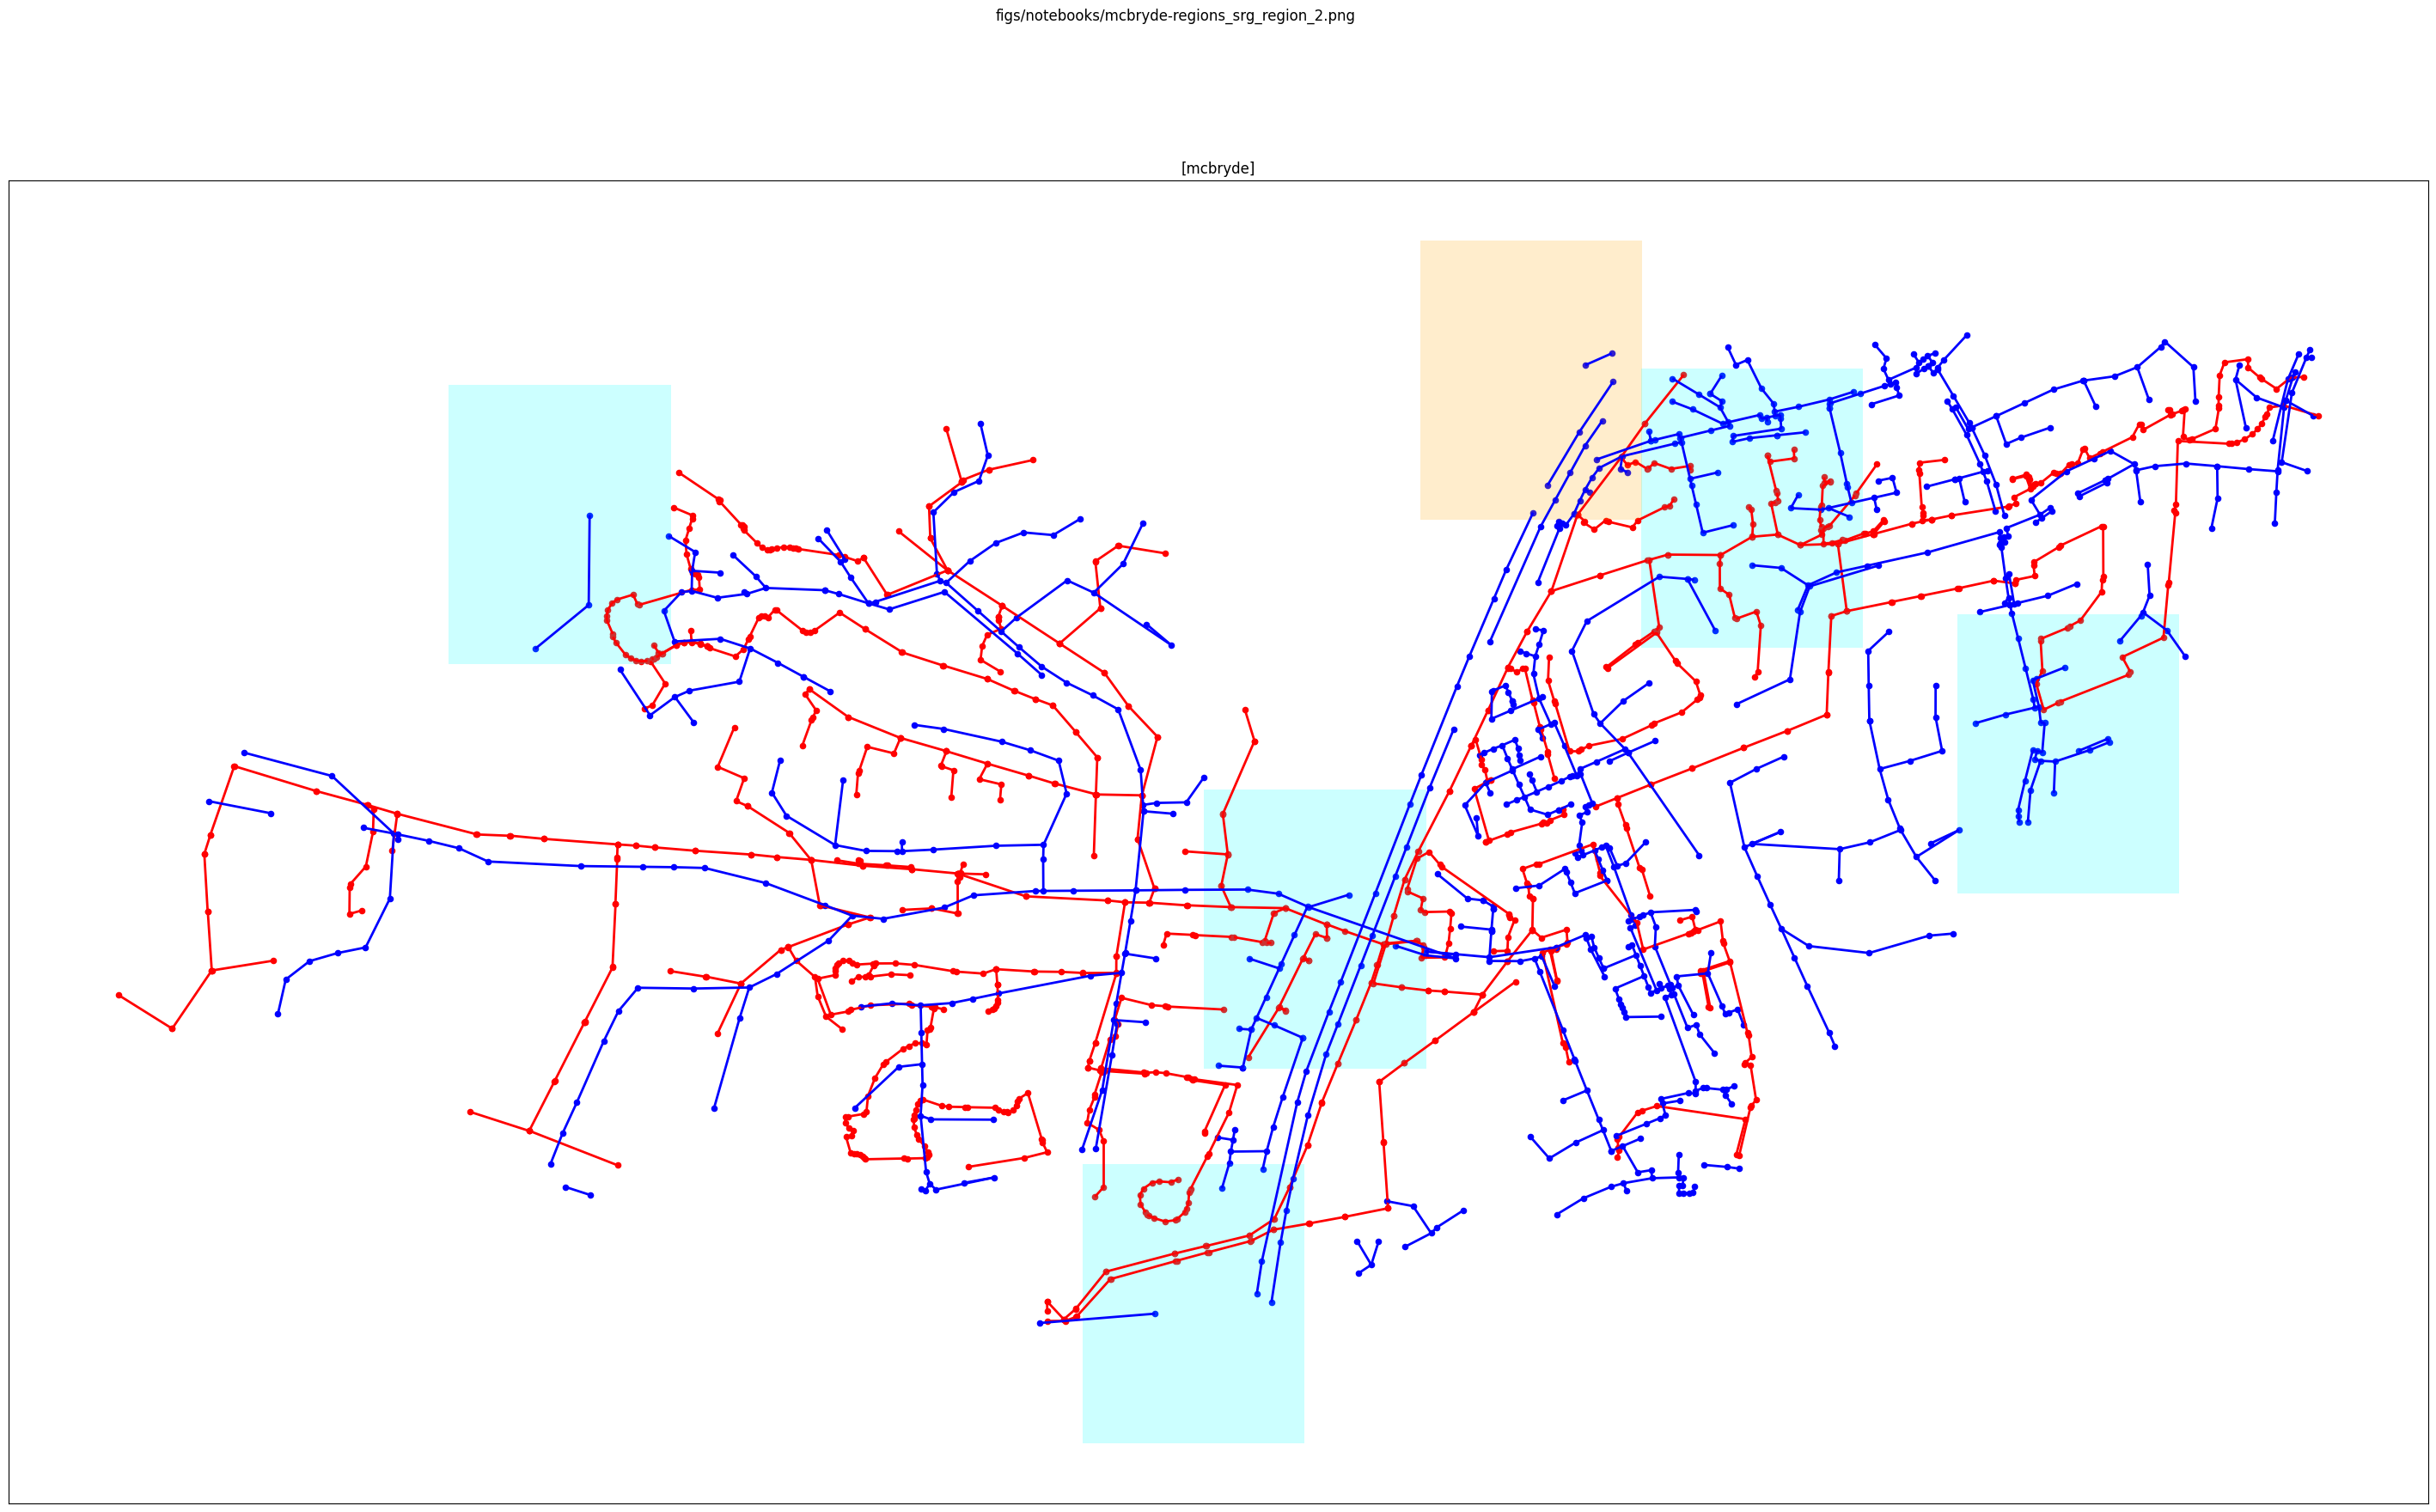

GLPK Simplex Optimizer 5.0
1454 rows, 1108 columns, 3048 non-zeros
      0: obj =   0.000000000e+00 inf =   6.500e+01 (65)
    100: obj =   2.025363894e-04 inf =   0.000e+00 (0)
Perturbing LP to avoid stalling [283]...
Removing LP perturbation [1049]...
*  1049: obj =   1.317442322e-04 inf =   0.000e+00 (0) 2
OPTIMAL LP SOLUTION FOUND


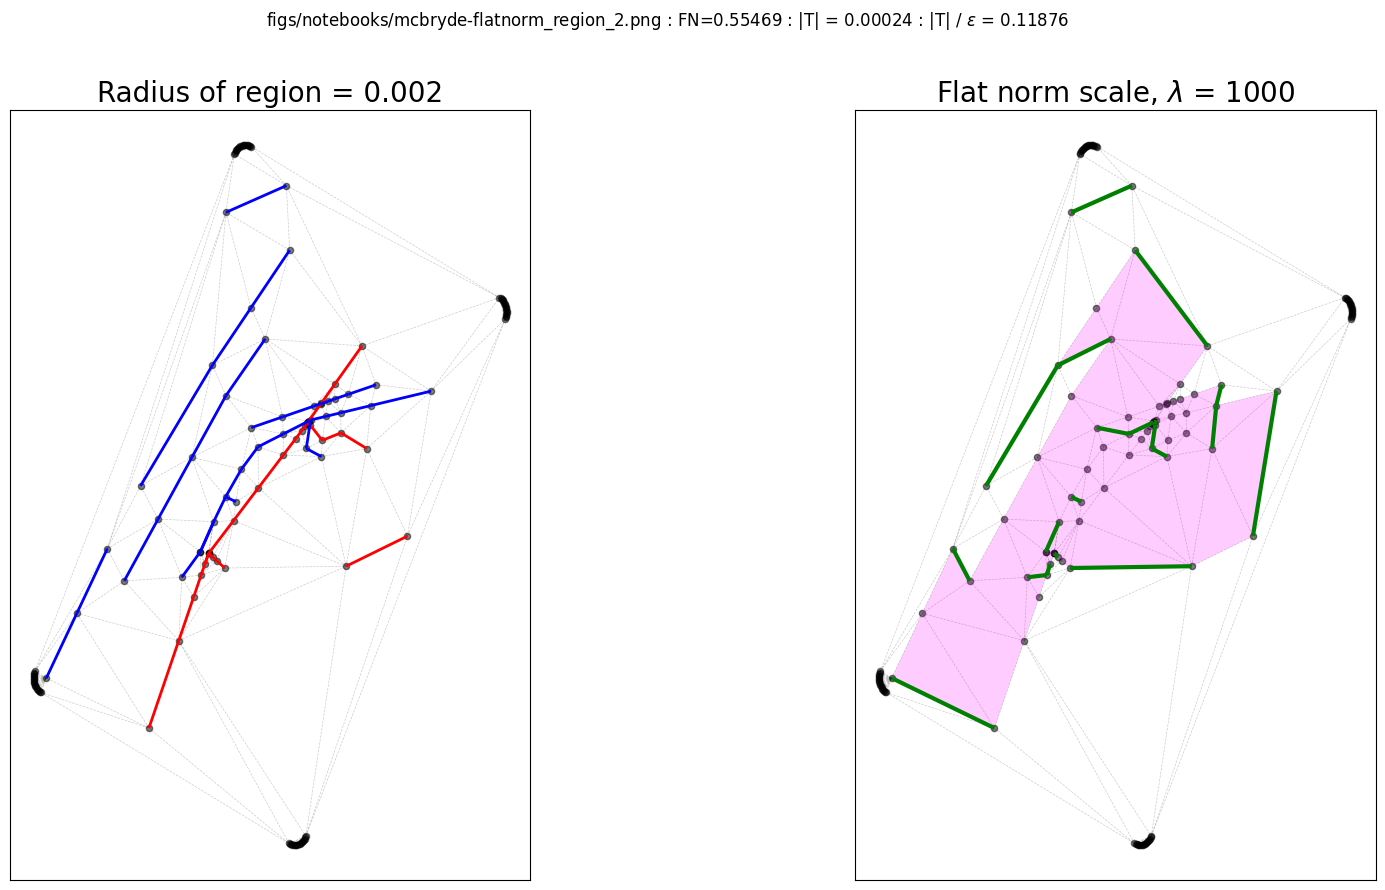

In [3]:
area = 'mcbryde'
epsilon, lambda_ = 2e-3, 1000
num_regions = 6
region = 2
fx.seed=54321

# read geometries
act_geom, synt_geom, hull = fx.read_networks(area)

# sample regions
point_list, region_list = fx.sample_regions_geom(
    hull, act_geom, synt_geom,
    num_regions=num_regions, epsilon=epsilon,
    seed=54321
)

# plot regions
fx.plot_regions_list(
    act_geom, synt_geom, region_list, area,
    region_highlight=region,
    file_name_sfx=f"srg_region_{region}",
    do_return=False,
    figsize=(40, 20)
)

# flat norm
norm, enorm, tnorm, w, plot_data = fx.compute_region_flatnorm(
    region_list[region], act_geom, synt_geom,
    lambda_=lambda_,
    normalized=True,
    plot=True
)

# plot flat norm
fx.plot_triangulated_region_flatnorm(
    epsilon=epsilon, lambda_=lambda_,
    to_file=f"{area}-flatnorm_region_{region}",
    suptitle_sfx=f"FN={norm:0.5f} : |T| = {w:0.5f} : |T| / $\\epsilon$ = {w / epsilon:0.5f}",
    do_return=False, show=True,
    **plot_data
)


# plot region flatnorm lines

In [ ]:
area = 'mcbryde'
epsilons, lambdas = np.linspace(5e-4, 2e-3, 4), np.linspace(1000, 100000, 5)
num_regions = 6
region = 2
fx.seed=54321

# read geometries
act_geom, synt_geom, hull = fx.read_networks(area)

points, regions = fx.sample_regions_geom(
    hull, act_geom, synt_geom,
    epsilon=epsilons[0],
    num_regions=num_regions,
    seed=fx.seed
)

# plot regions
fx.plot_regions_list(
    act_geom, synt_geom, regions, area,
    region_highlight=region,
    file_name_sfx=f"_region_{region}",
    do_return=False, show=True,
    figsize=(40, 20)
)

# flat norm
flatnorm_data = {
    'epsilons': [], 'lambdas': [], 'flatnorms': [],
    'norm_lengths': [], 'norm_areas': []
}

start = timer()
for epsilon in epsilons:
    for lambda_ in lambdas:
        norm, enorm, tnorm, w = fx.compute_region_flatnorm(
            fx.get_region(points[region], epsilon),
            act_geom, synt_geom,
            lambda_=lambda_,
            normalized=True,
            plot=False
        )
        flatnorm_data['epsilons'].append(f"{epsilon:0.4f}")
        flatnorm_data['lambdas'].append(lambda_)
        flatnorm_data['flatnorms'].append(norm)
        flatnorm_data['norm_lengths'].append(enorm)
        flatnorm_data['norm_areas'].append(tnorm)

end = timer()

fig, ax = fx.plot_region_flatnorm_lines(
    epsilons=flatnorm_data['epsilons'],
    lambdas=flatnorm_data['lambdas'],
    flatnorms=flatnorm_data['flatnorms'],
    to_file=f"{area}-flatnorm-lines_region_{region}",
    do_return=True
)

print("--------------------------------------------------------------------------")
print(f"compute region flatnorm "
      f"for {len(epsilons)} epsilons "
      f"and {len(lambdas)} lambdas = {timedelta(seconds=end-start)}")
print("--------------------------------------------------------------------------")
flatnorm_data = pd.DataFrame(flatnorm_data)
flatnorm_data


# flatnorm stats

In [4]:
fx.out_dir = "out/test"
%ls {fx.out_dir}

mcbryde-flatnorm-stats_50_regions.csv


In [ ]:
area = 'mcbryde'
epsilons, lambdas = np.linspace(5e-4, 2e-3, 4), np.linspace(1000, 100000, 5)
num_regions = 50
fx.out_dir = "out/test"
file_name = f"{area}-flatnorm-stats_{num_regions}_regions"

flatnorm_df = pd.read_csv(
    f"{fx.out_dir}/{file_name}.csv",
    sep=",",
    # header=
)
flatnorm_df = flatnorm_df.set_index(['epsilons', 'lambdas'], drop=False)
flatnorm_df

In [ ]:
flatnorm_df

In [ ]:
flatnorm_df.groupby(level=['epsilons', 'lambdas']).max()

(array([ 1.,  1.,  0.,  0.,  1.,  0.,  3.,  2.,  1.,  5.,  3.,  4.,  3.,
         6., 10.,  1.,  2.,  3.,  1.,  3.]),
 array([0.28638191, 0.31395154, 0.34152116, 0.36909079, 0.39666041,
        0.42423004, 0.45179967, 0.47936929, 0.50693892, 0.53450854,
        0.56207817, 0.58964779, 0.61721742, 0.64478704, 0.67235667,
        0.69992629, 0.72749592, 0.75506554, 0.78263517, 0.81020479,
        0.83777442]),
 <BarContainer object of 20 artists>)

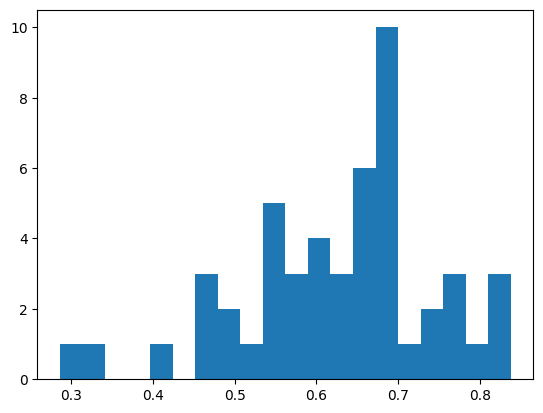

In [12]:
plt.hist(flatnorm_df.loc[(epsilons[2], lambdas[2]), 'flatnorms'], bins = 20)


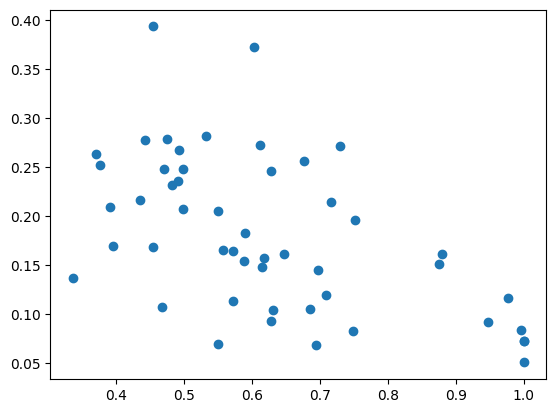

In [21]:
plt.scatter(
    flatnorm_df.loc[(epsilons[0], lambdas[0]), 'flatnorms'],
    flatnorm_df.loc[(epsilons[0], lambdas[0]), 'input_ratios'],
)
# T  = T1 - T2
# T_ratio = |T| / eps

## histograms

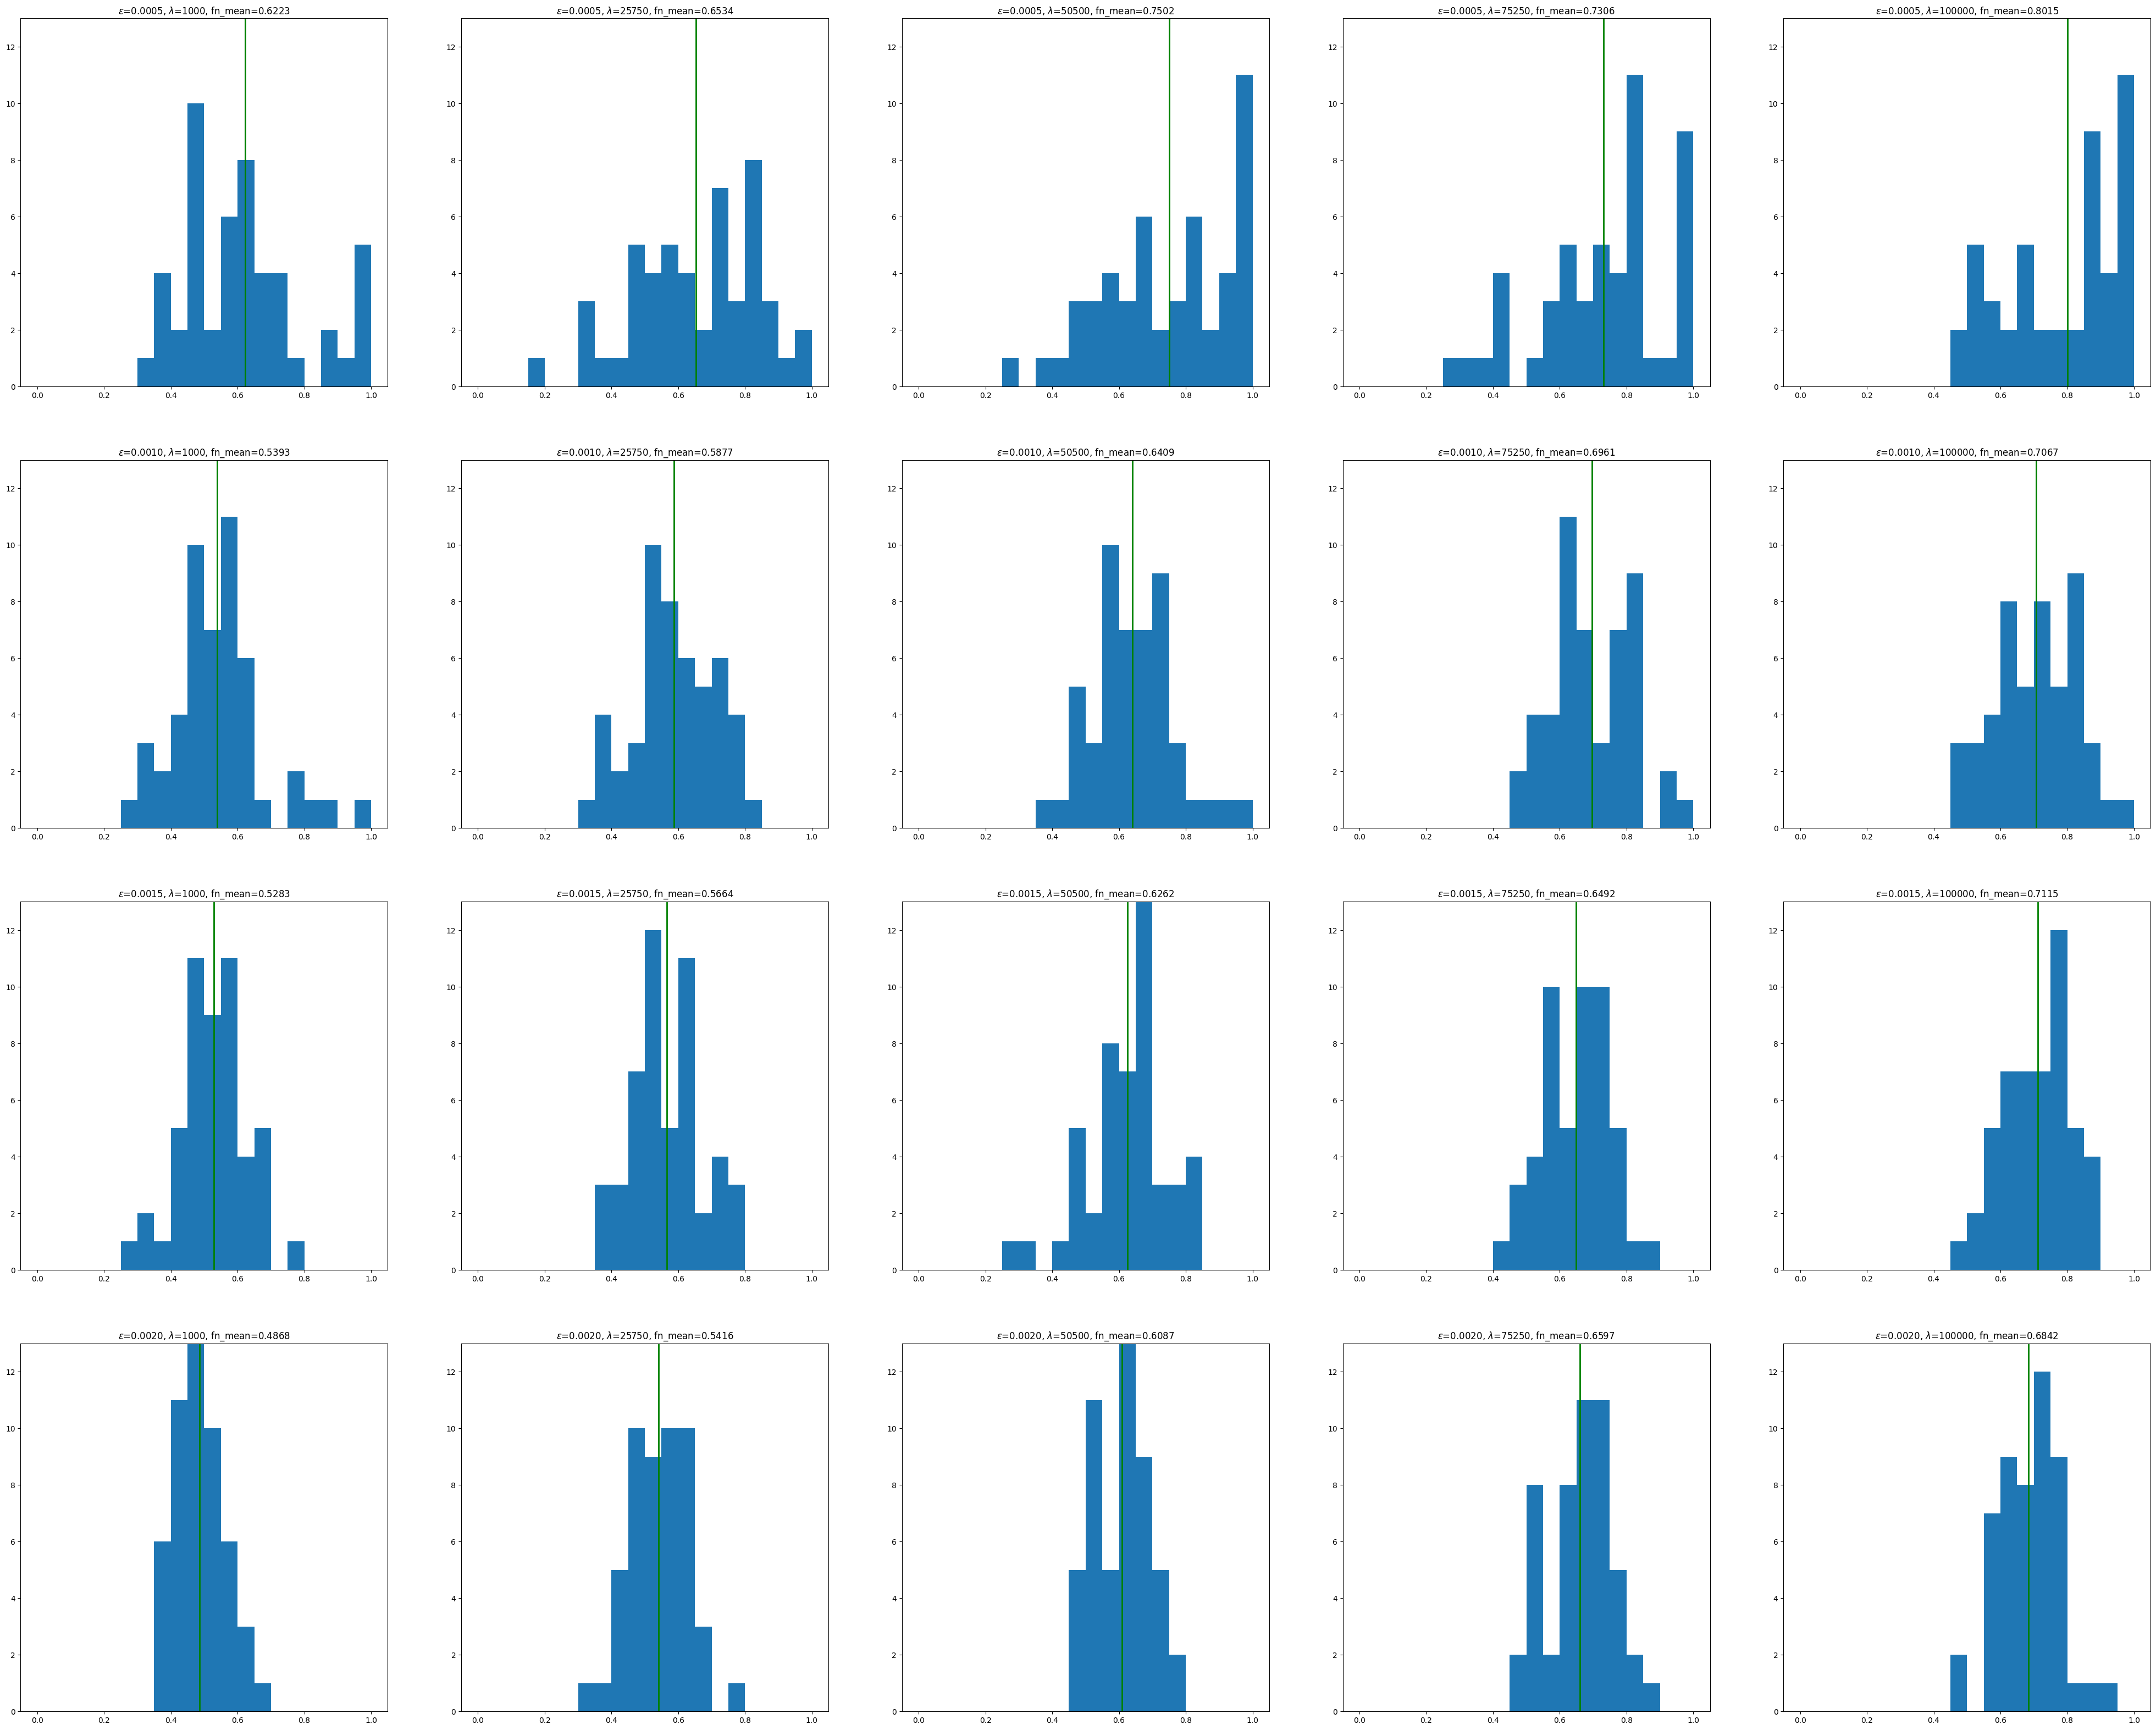

epsilons   lambdas  flatnorms  norm_lengths    norm_areas  \
epsilons lambdas                                                               
0.0005   1000.0      0.0005    1000.0   0.622294      0.000052  1.834719e-10   
         25750.0     0.0005   25750.0   0.653386      0.000046  1.407235e-10   
         50500.0     0.0005   50500.0   0.750228      0.000049  8.723502e-11   
         75250.0     0.0005   75250.0   0.730590      0.000044  1.097640e-10   
         100000.0    0.0005  100000.0   0.801534      0.000052  9.942765e-11   
0.0010   1000.0      0.0010    1000.0   0.539254      0.000109  5.256445e-10   
         25750.0     0.0010   25750.0   0.587690      0.000112  4.188035e-10   
         50500.0     0.0010   50500.0   0.640929      0.000119  4.090218e-10   
         75250.0     0.0010   75250.0   0.696119      0.000130  3.265286e-10   
         100000.0    0.0010  100000.0   0.706698      0.000111  2.667519e-10   
0.0015   1000.0      0.0015    1000.0   0.528281      0.000204  1.123103e-09   
         25750.0     0.0015   25750.0   0.566447      0.000202  8.428175e-10   
         50500.0     0.0015   50500.0   0.626150      0.000202  7.448468e-10   
         75250.0     0.0015   75250.0   0.649226      0.000221  6.796713e-10   
         100000.0    0.0015  100000.0   0.711544      0.000215  5.256830e-10   
0.0020   1000.0      0.0020    1000.0   0.486787      0.000299  1.856481e-09   
         25750.0     0.0020   25750.0   0.541580      0.000317  1.668685e-09   
         50500.0     0.0020   50500.0   0.608689      0.000320  1.388076e-09   
         75250.0     0.0020   75250.0   0.659680      0.000327  1.040626e-09   
         100000.0    0.0020  100000.0   0.684219      0.000344  8.741327e-10   

                   input_lengths  input_ratios  
epsilons lambdas                                
0.0005   1000.0         0.000091      0.181354  
         25750.0        0.000079      0.157326  
         50500.0        0.000076      0.151025  
         75250.0        0.000072      0.144296  
         100000.0       0.000079      0.158602  
0.0010   1000.0         0.000211      0.210787  
         25750.0        0.000210      0.209717  
         50500.0        0.000223      0.222594  
         75250.0        0.000226      0.225825  
         100000.0       0.000197      0.196900  
0.0015   1000.0         0.000395      0.263297  
         25750.0        0.000402      0.268251  
         50500.0        0.000388      0.258715  
         75250.0        0.000421      0.280580  
         100000.0       0.000379      0.252640  
0.0020   1000.0         0.000630      0.314925  
         25750.0        0.000668      0.333961  
         50500.0        0.000652      0.326193  
         75250.0        0.000621      0.310320  
         100000.0       0.000638      0.319024

In [28]:
L = len(lambdas)
E = len(epsilons)
fig, axs = plt.subplots(E, L, figsize=(L*10, E*10))
for e, epsilon in enumerate(epsilons):
    for l, lambda_ in enumerate(lambdas):
        axs[e][l].hist(
            flatnorm_df.loc[(epsilon, lambda_), 'flatnorms'],
            bins = 20,
            range=(0, 1),
        )

        fn_mean = flatnorm_df.loc[(epsilon, lambda_), 'flatnorms'].mean()
        axs[e][l].plot(
            [fn_mean, fn_mean], [0, 15],
            c='green', linewidth=2
        )

        axs[e][l].set_title(f"$\epsilon$={epsilon:0.4f}, $\lambda$={int(lambda_):d}, fn_mean={fn_mean:0.4f}")
        axs[e][l].set_ylim(bottom=0, top=13)

        pass

file_name = f"{area}-flatnorm-hists_{num_regions}_regions"
close_fig(fig, to_file=f"{fx.fig_dir}/{file_name}.png", show=True)

flatnorm_df.groupby(level=['epsilons', 'lambdas']).mean()

In [31]:
flatnorm_df

epsilons   lambdas  flatnorms  norm_lengths    norm_areas  \
epsilons lambdas                                                               
0.0005   1000.0      0.0005    1000.0   0.532610      0.000075  2.205806e-10   
         1000.0      0.0005    1000.0   0.874905      0.000066  7.041961e-11   
         1000.0      0.0005    1000.0   0.475400      0.000066  2.085881e-10   
         1000.0      0.0005    1000.0   0.550265      0.000019  6.434193e-11   
         1000.0      0.0005    1000.0   0.390828      0.000041  1.435467e-10   
...                     ...       ...        ...           ...           ...   
0.0020   100000.0    0.0020  100000.0   0.653756      0.000487  1.163377e-09   
         100000.0    0.0020  100000.0   0.788579      0.000483  1.580224e-09   
         100000.0    0.0020  100000.0   0.662506      0.000422  7.989041e-10   
         100000.0    0.0020  100000.0   0.554626      0.000323  8.734837e-10   
         100000.0    0.0020  100000.0   0.717911      0.000286  6.145083e-10   

                   input_lengths  input_ratios  
epsilons lambdas                                
0.0005   1000.0         0.000141      0.282298  
         1000.0         0.000076      0.151003  
         1000.0         0.000140      0.279057  
         1000.0         0.000035      0.070026  
         1000.0         0.000105      0.209184  
...                          ...           ...  
0.0020   100000.0       0.000923      0.461292  
         100000.0       0.000813      0.406583  
         100000.0       0.000757      0.378692  
         100000.0       0.000740      0.370036  
         100000.0       0.000485      0.242306  

[1000 rows x 7 columns]

In [35]:
idx = pd.IndexSlice
flatnorm_df.loc[idx[:, lambdas[1]], idx[:]]

epsilons  lambdas  flatnorms  norm_lengths    norm_areas  \
epsilons lambdas                                                             
0.0005   25750.0    0.0005  25750.0   0.389444      0.000049  1.024233e-10   
         25750.0    0.0005  25750.0   0.724538      0.000035  2.912175e-10   
         25750.0    0.0005  25750.0   0.618395      0.000039  9.550291e-11   
         25750.0    0.0005  25750.0   0.705090      0.000062  4.377013e-11   
         25750.0    0.0005  25750.0   0.811564      0.000063  1.489052e-10   
...                    ...      ...        ...           ...           ...   
0.0020   25750.0    0.0020  25750.0   0.460294      0.000166  8.914132e-10   
         25750.0    0.0020  25750.0   0.518466      0.000342  3.037905e-09   
         25750.0    0.0020  25750.0   0.530529      0.000250  1.466493e-09   
         25750.0    0.0020  25750.0   0.646005      0.000483  1.840812e-09   
         25750.0    0.0020  25750.0   0.494505      0.000301  1.434191e-09   

                  input_lengths  input_ratios  
epsilons lambdas                               
0.0005   25750.0       0.000132      0.263201  
         25750.0       0.000058      0.116973  
         25750.0       0.000067      0.133769  
         25750.0       0.000089      0.178926  
         25750.0       0.000082      0.163714  
...                         ...           ...  
0.0020   25750.0       0.000410      0.205194  
         25750.0       0.000811      0.405479  
         25750.0       0.000543      0.271478  
         25750.0       0.000821      0.410322  
         25750.0       0.000684      0.341969  

[200 rows x 7 columns]

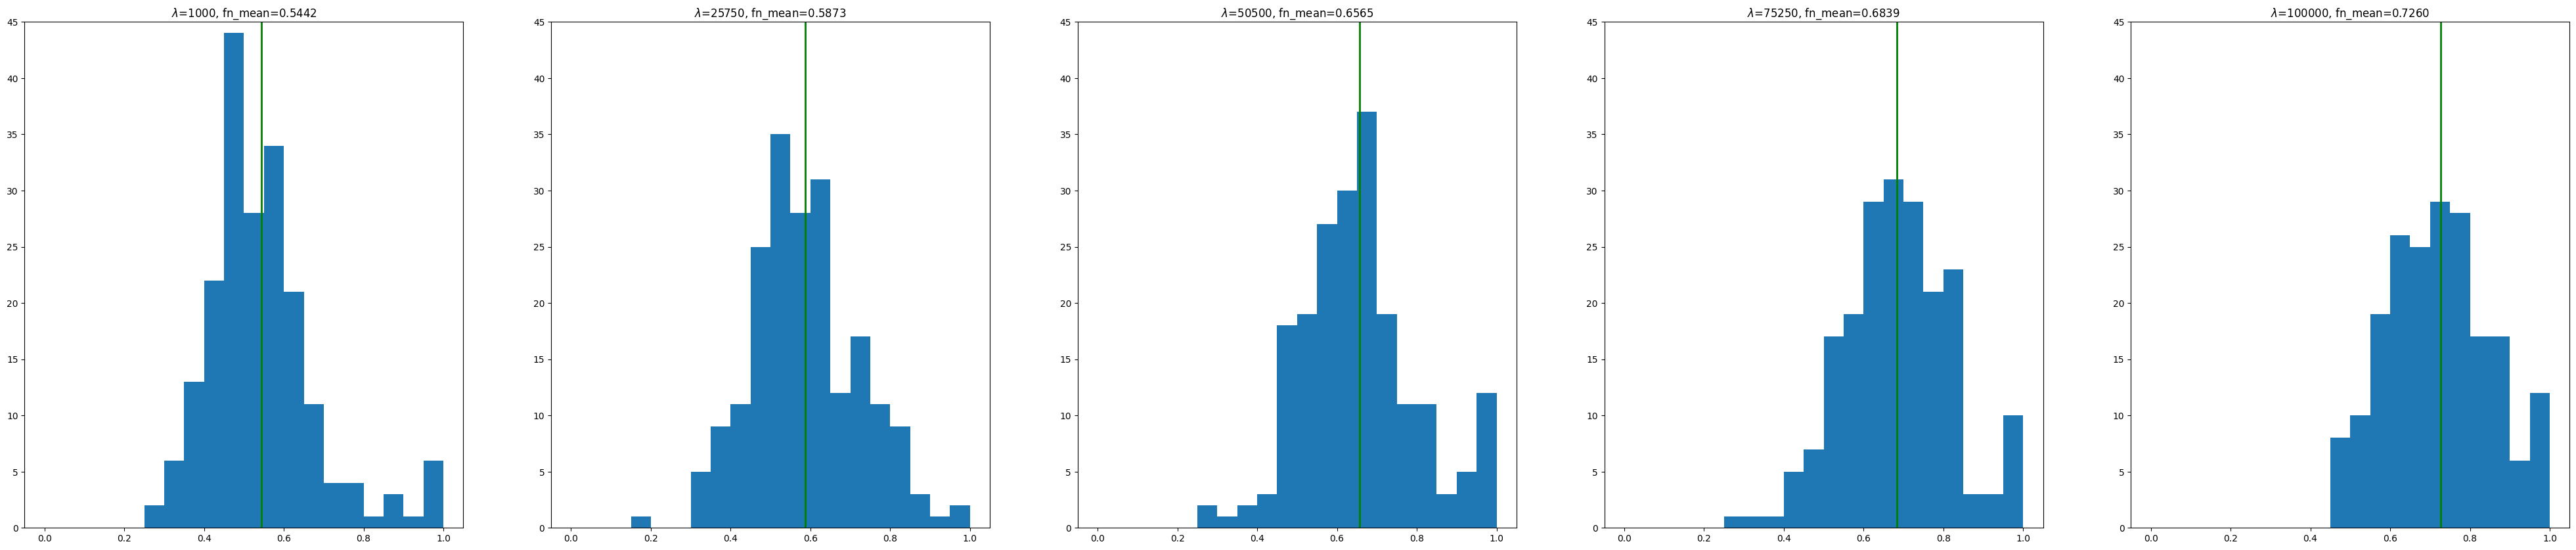

In [38]:
# BY LAMBDAS
L = len(lambdas)
idx = pd.IndexSlice
fig, axs = plt.subplots(1, L, figsize=(L*10, 10))
for l, lambda_ in enumerate(lambdas):
    axs[l].hist(
        flatnorm_df.loc[idx[:, lambda_], 'flatnorms'],
        bins = 20,
        range=(0, 1),
    )

    fn_mean = flatnorm_df.loc[idx[:, lambda_], 'flatnorms'].mean()
    axs[l].plot(
        [fn_mean, fn_mean], [0, 100],
        c='green', linewidth=2
    )

    axs[l].set_title(f"$\lambda$={int(lambda_):d}, fn_mean={fn_mean:0.4f}")
    axs[l].set_ylim(bottom=0, top=45)

    pass

file_name = f"{area}-flatnorm-hists-lambdas_{num_regions}_regions"
close_fig(fig, to_file=f"{fx.fig_dir}/{file_name}.png", show=True)


In [34]:
E


4

## scatter plots

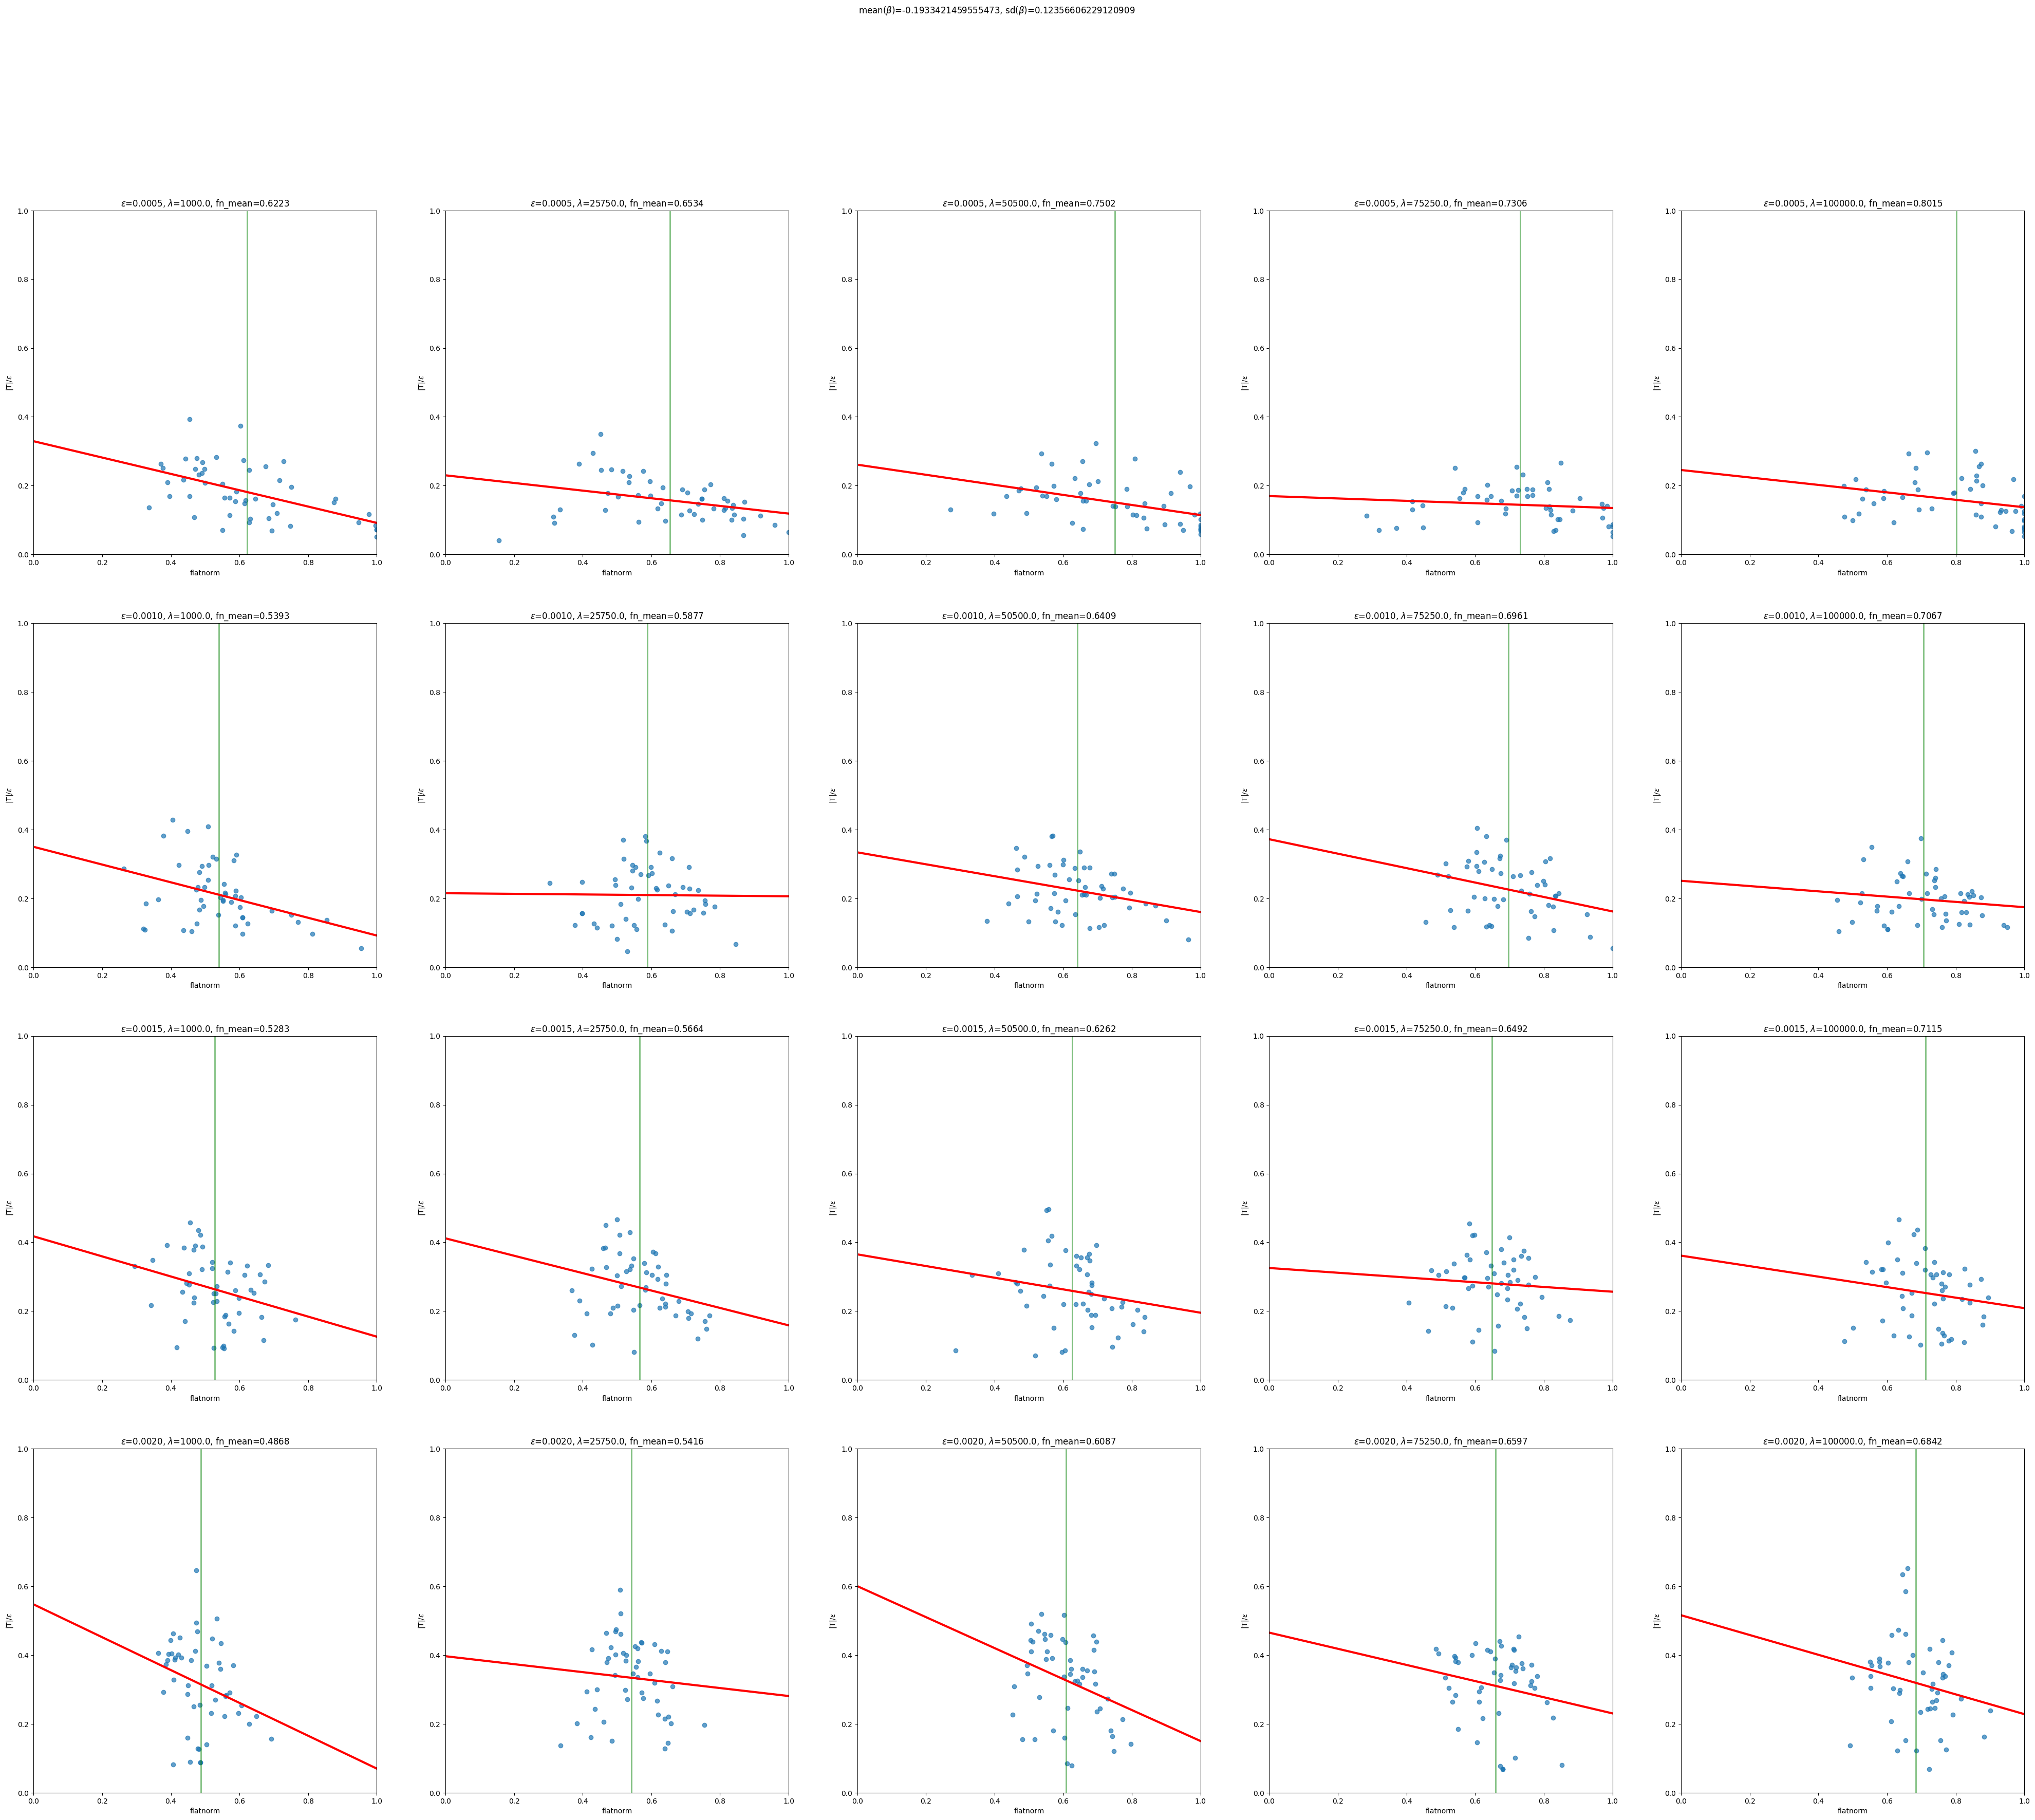

In [51]:
L = len(lambdas)
E = len(epsilons)
reg_coefs = []
fig, axs = plt.subplots(E, L, figsize=(L*10, E*10))
for e, epsilon in enumerate(epsilons):
    for l, lambda_ in enumerate(lambdas):
        x_flatnorms = flatnorm_df.loc[(epsilon, lambda_), 'flatnorms']
        y_ratios = flatnorm_df.loc[(epsilon, lambda_), 'input_ratios']
        axs[e][l].scatter(
            x_flatnorms,
            y_ratios,
            alpha=0.7
        )

        # mean line
        fn_mean = x_flatnorms.mean()
        axs[e][l].plot(
            [fn_mean, fn_mean], [0, 100],
            c='green', linewidth=2, alpha=0.5
        )

        axs[e][l].set_title(f"$\epsilon$={epsilon:0.4f}, $\lambda$={lambda_}, fn_mean={fn_mean:0.4f}")
        axs[e][l].set_xlabel("flatnorm")
        axs[e][l].set_ylabel("|T|/$\epsilon$")
        axs[e][l].set_xlim(left=0, right=1)
        axs[e][l].set_ylim(bottom=0, top=1)


        # regression line
        b, a = np.polyfit(x_flatnorms, y_ratios, deg=1)
        reg_coefs.append(b)
        xseq = np.linspace(0, 1, num=10)
        axs[e][l].plot(xseq, a + b * xseq, color="red", lw=3);
        pass

import statistics
rc_mean, rc_std = statistics.mean(reg_coefs), statistics.stdev(reg_coefs)
fig.suptitle(f"mean($\\beta$)={rc_mean}, sd($\\beta$)={rc_std}")
file_name = f"{area}-flatnorm-input-ratios_{num_regions}_regions"
close_fig(fig, to_file=f"{fx.fig_dir}/{file_name}.png", show=True)



In [48]:
import statistics
statistics.mean(reg_coefs), statistics.stdev(reg_coefs)

(0.35812329861917586, 0.11413358294025899)

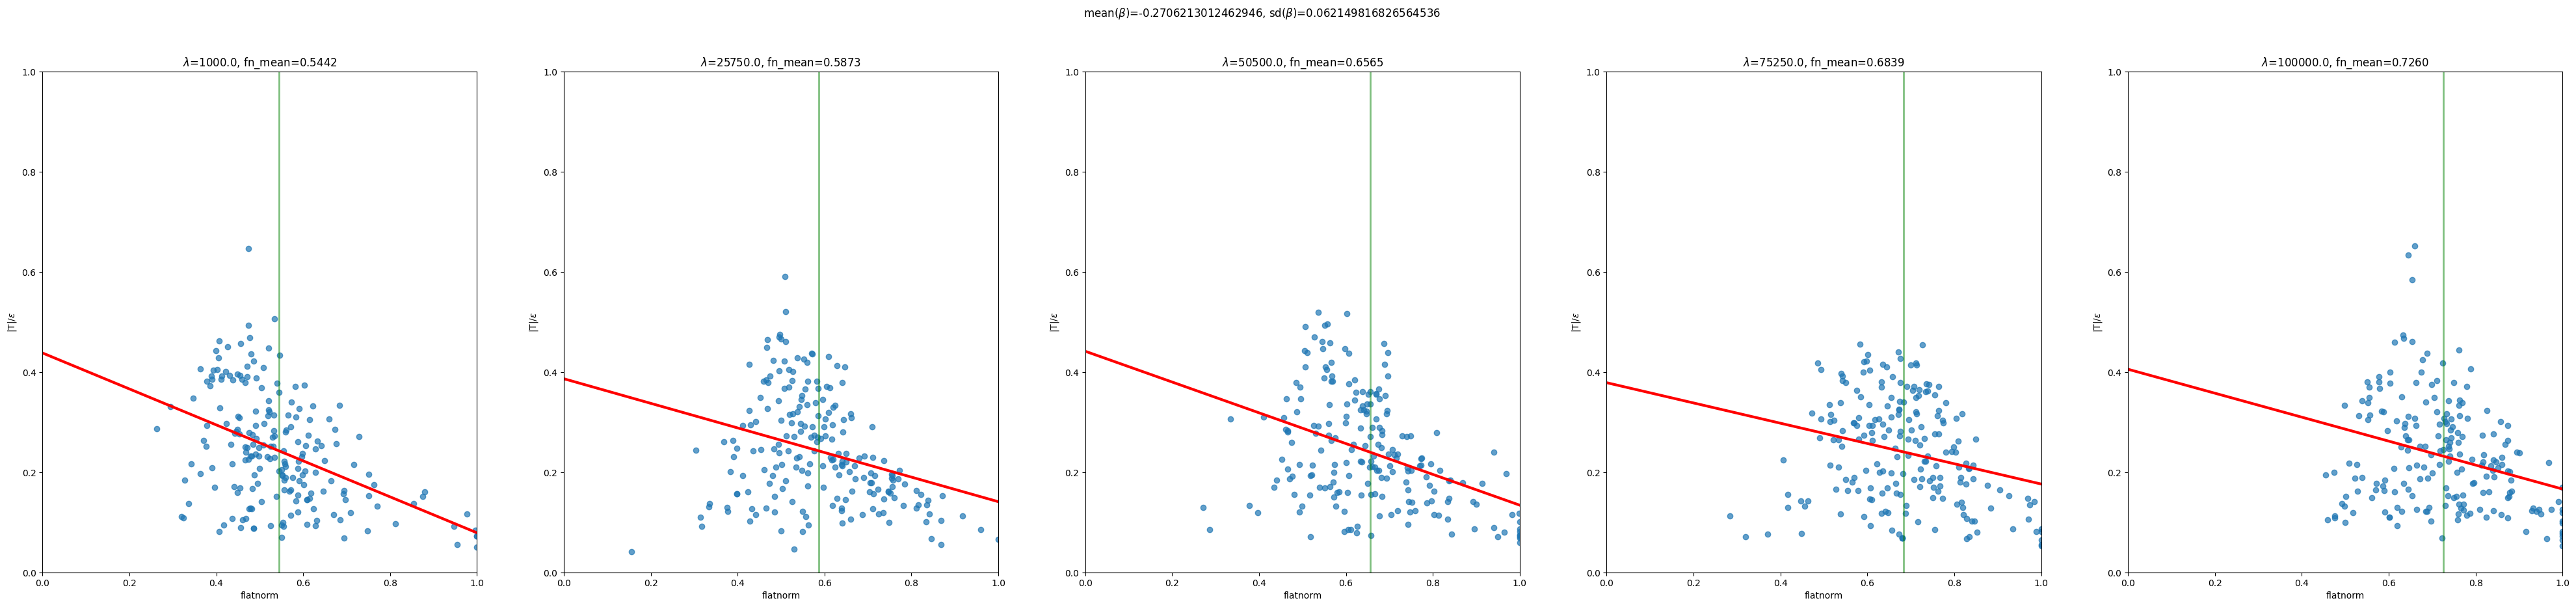

(-0.2706213012462946, 0.062149816826564536)

In [52]:
# BY LAMBDAS
L = len(lambdas)
fig, axs = plt.subplots(1, L, figsize=(L*10, 10))
idx = pd.IndexSlice
reg_coefs = []
for l, lambda_ in enumerate(lambdas):
    x_flatnorms = flatnorm_df.loc[idx[:, lambda_], 'flatnorms']
    y_ratios = flatnorm_df.loc[idx[:, lambda_], 'input_ratios']
    axs[l].scatter(
        x_flatnorms,
        y_ratios,
        alpha=0.7
    )

    # mean line
    fn_mean = x_flatnorms.mean()
    axs[l].plot(
        [fn_mean, fn_mean], [0, 100],
        c='green', linewidth=2, alpha=0.5
    )

    axs[l].set_title(f"$\lambda$={lambda_}, fn_mean={fn_mean:0.4f}")
    axs[l].set_xlabel("flatnorm")
    axs[l].set_ylabel("|T|/$\epsilon$")

    axs[l].set_xlim(left=0, right=1)
    axs[l].set_ylim(bottom=0, top=1)

    # regression line
    b, a = np.polyfit(x_flatnorms, y_ratios, deg=1)
    reg_coefs.append(b)
    xseq = np.linspace(0, 1, num=10)
    axs[l].plot(xseq, a + b * xseq, color="red", lw=3);

    pass

import statistics
rc_mean, rc_std = statistics.mean(reg_coefs), statistics.stdev(reg_coefs)
fig.suptitle(f"mean($\\beta$)={rc_mean}, sd($\\beta$)={rc_std}")
file_name = f"{area}-flatnorm-input-ratios-lambdas_{num_regions}_regions"
close_fig(fig, to_file=f"{fx.fig_dir}/{file_name}.png", show=True)

statistics.mean(reg_coefs), statistics.stdev(reg_coefs)

In [53]:
reg_coefs


[-0.3589939787248088,
 -0.24543264296983716,
 -0.3072716398030238,
 -0.20227176650913148,
 -0.23913647822467166]